<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [113]:
import pandas as pd
import psycopg2

In [114]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [116]:
# поиск уникальных id вакансий в таблице vacancies
query_3_1 = '''SELECT count(distinct id) as unique_vacancy_count
               FROM vacancies;'''

In [117]:
df = pd.read_sql_query(query_3_1, connection)
print(df)

   unique_vacancy_count
0                 49197


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3051125570.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [118]:
# поиск уникальных id работодателей в таблице employers
query_3_2 = f'''SELECT count(distinct id) as unique_employer_count                
                FROM employers;'''


In [119]:
df = pd.read_sql_query(query_3_2, connection)
print(df)

   unique_employer_count
0                  23501


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\198591577.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [120]:
# поиск уникальных id локаций в таблице areas
query_3_3 = f'''SELECT count(distinct id) as unique_area_count
                FROM areas;'''

In [121]:
df = pd.read_sql_query(query_3_3, connection)
print(df)

   unique_area_count
0               1362


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2593644333.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [122]:
# поиск уникальных id индустрий в таблице industries
query_3_4 = f'''SELECT count(distinct id) as unique_industries_count
                FROM industries;'''

In [123]:
df = pd.read_sql_query(query_3_4, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2881202045.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


   unique_industries_count
0                      294


***

В анализируемой базе данных содержится 49 197 вакансий от 23 501 работодателя, охватывающих 1 362 региона и относящихся к 294 различным сферам деятельности. База включает пять связанных таблиц, которые содержат 11 параметров, подлежащих анализу, а также 8 индентификационных ключей. В базе описываются значимые навыки, режим работы и тип занятости, а также ожидания по заработной плате соискателей.

Понятно, что объем такой информации сложно оценить без применения вспомогательных алгоритмов поиска. Модель машинного обучения, основанная на анализе данных кадрового агентства, может использовать разнообразные методы и алгоритмы анализа, чтобы выявлять закономерности, предпочтения работодателей и требования к кандидатам. Прежде всего, она может проанализировать актуальные тенденции на рынке труда в IT, используя информацию о вакансиях. В результате этого анализа модель сможет рекомендовать клиенту изучение и развитие определенных технологий или языков программирования, которые в настоящее время пользуются наибольшим спросом. Например, если в базе данных преобладают вакансии для специалистов, знающих Python и машинное обучение, она может предложить клиенту пройти курсы по этим темам.

Кроме того, модель сможет оценить резюме клиента на предмет его соответствия требованиям работодателей. Это включает в себя анализ ключевых слов и фраз, характерных для успешных резюме других соискателей, содержащихся в базе. Если, скажем, большинство удачных кандидатов обладает опытом работы с определенными фреймворками или инструментами, модель сможет посоветовать клиенту обновить резюме, выделив эти навыки. Также она сможет углубленно исследовать личные предпочтения клиента и его карьерные цели. Например, изучая информацию о компаниях, где работают другие кандидаты с похожими профилями, модель может рекомендовать клиенту обратить внимание на определенные организации, которые соответствуют его интересам и ценностям.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [124]:
# подсчет количества вакансий для каждого уникального id локации и поиск наименования локации 
query_4_1 = f'''SELECT     
                    a.name as region_name,
                    count(v.area_id) as cnt
                FROM 
                    vacancies v
                JOIN 
                    areas a on v.area_id = a.id
                GROUP BY 
                    a.name
                ORDER BY 
                    cnt DESC
                limit 5;;'''

In [125]:
df = pd.read_sql_query(query_4_1, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3065681533.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


       region_name   cnt
0           Москва  5333
1  Санкт-Петербург  2851
2            Минск  2112
3      Новосибирск  2006
4           Алматы  1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [126]:
# подсчет количества вакансий с сообщеными пользователями параметрами salary 
query_4_2 = f'''SELECT 
                    count(*) as cnt
                FROM 
                    vacancies
                WHERE 
                    salary_from is not null or salary_to is not null;'''

In [127]:
df = pd.read_sql_query(query_4_2, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2394163103.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


     cnt
0  24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [128]:
query_4_3 = f'''SELECT 
                    round(avg(salary_from)) AS avg_salary_from,
                    round(avg(salary_to)) AS avg_salary_to
                FROM 
                    Vacancies'''

In [129]:
df = pd.read_sql_query(query_4_3, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\261386216.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


   avg_salary_from  avg_salary_to
0          71065.0       110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [130]:
query_4_4 = f'''SELECT 
                    schedule,
                    employment,
                    COUNT(*) AS vacancy_count
                FROM 
                    Vacancies
                GROUP BY 
                    schedule, employment
                ORDER BY 
                    vacancy_count DESC;'''

In [131]:
df = pd.read_sql_query(query_4_4, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3904735251.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


            schedule           employment  vacancy_count
0        Полный день     Полная занятость          35367
1   Удаленная работа     Полная занятость           7802
2      Гибкий график     Полная занятость           1593
3   Удаленная работа  Частичная занятость           1312
4     Сменный график     Полная занятость            940
5        Полный день           Стажировка            569
6     Вахтовый метод     Полная занятость            367
7        Полный день  Частичная занятость            347
8      Гибкий график  Частичная занятость            312
9        Полный день     Проектная работа            141
10  Удаленная работа     Проектная работа            133
11     Гибкий график           Стажировка            116
12    Сменный график  Частичная занятость            101
13  Удаленная работа           Стажировка             64
14     Гибкий график     Проектная работа             18
15    Сменный график           Стажировка             12
16    Вахтовый метод     Проект

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [132]:
query_4_5 = f'''SELECT 
                    experience,
                    count(*) AS vacancy_count
                FROM 
                    Vacancies
                GROUP BY 
                    experience
                ORDER BY 
                    vacancy_count ASC;'''

In [133]:
df = pd.read_sql_query(query_4_5, connection)
print(df)

           experience  vacancy_count
0         Более 6 лет           1337
1           Нет опыта           7197
2       От 3 до 6 лет          14511
3  От 1 года до 3 лет          26152


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2220680361.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


***

База данных, представляется достаточно интересной и отражает текущие тенденции на рынке труда. Во-первых, фиксируется концентрация вакансий в пяти крупнейших агломерациях, что указывает на то, что крупные города остаются центрами карьерных возможностей. Это может свидетельствовать о развитии локализованной Ultra-экономики крупных агломераций и востребованности труда в этих регионах, в то время как вакансии в менее населенных местах, вероятно, становятся менее привлекательными.Отсутствие указания границ ожидаемой заработной платы у более половины респондентов может говорить о неопределенности на рынке, а также о недостаточном уровне информированности кандидатов относительно ценности своего труда. Это также может быть связано с тем, что многие из них только начинают свой карьерный путь и не имеют четкого представления о рыночных ставках или не уверены в своих навыках и опыте.Необходимо отметить, что средние значения заработной платы, которые различаются незначительно, могут указывать на уровень однородности вакансий по оплате труда, что может быть как положительным, так и отрицательным фактором. Это может свидетельствовать о недостаточной конкуренции среди работодателей, которые предлагают схожие условия труда, или о том, что профессии, представленные на платформе, имеют более или менее стандартные уровни вознаграждения.
Удаленная работа, ставшая новой нормой и популярностью среди кандидатов, отражает изменение подходов к трудовой деятельности, особенно в контексте постпандемической реальности. Это может быть как плюсом — расширяя возможности для кандидатов, так и минусом — затрудняя работодателям поиск подходящих offline - специалистов вне крупных агломераций.
Наконец, использование платформы HeadHunter преимущественно кандидатами с небольшим опытом работы может говорить о том, что ресурс ориентирован на начальные позиции, что также может сказываться на общем уровне предлагаемых зарплат и спецификации вакансий.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [134]:
#Создаем вспомогательную таблицу RankedEmployers в которую помещаем информацию о работодателях и количестве вакансий и далее основной запрос
query_5_1 = f'''WITH RankedEmployers AS (
                SELECT 
                    e.name AS employer_name, 
                    COUNT(v.employer_id) AS vacancy_count
                FROM 
                    Employers e
                JOIN 
                    Vacancies v ON e.id = v.employer_id
                GROUP BY 
                    e.name
                ORDER BY 
                    vacancy_count DESC
                LIMIT 5
            )

                SELECT 
                    employer_name, 
                    vacancy_count
                FROM 
                    RankedEmployers
                ORDER BY 
                    vacancy_count DESC;'''

In [135]:
df = pd.read_sql_query(query_5_1, connection)
print(df)

   employer_name  vacancy_count
0         Яндекс           1933
1     Ростелеком            491
2       Тинькофф            444
3           СБЕР            428
4  Газпром нефть            331


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\303496794.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [136]:
#Создаем таблицу RegionStats в которую помещаем статистику по регионам и далее основной запрос
query_5_2 = f'''WITH RegionStats AS (
    SELECT 
        a.id AS area_id,
        a.name AS area_name,
        COUNT(DISTINCT e.id) AS employer_count,
        COUNT(v.id) AS vacancy_count
    FROM 
        Areas a
    LEFT JOIN 
        Employers e ON a.id = e.area
    LEFT JOIN 
        Vacancies v ON a.id = v.area_id
    GROUP BY 
        a.id, a.name
    )

    SELECT 
        area_id, 
        area_name,
        employer_count, 
        vacancy_count
    FROM 
        RegionStats
    WHERE 
        vacancy_count = 0
    ORDER BY 
        employer_count DESC
    LIMIT 5;
    '''

In [137]:
df = pd.read_sql_query(query_5_2, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2309033045.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


   area_id           area_name  employer_count  vacancy_count
0      113              Россия             410              0
1       40           Казахстан             207              0
2     2019  Московская область              75              0
3     1438  Краснодарский край              19              0
4       16            Беларусь              18              0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [138]:
query_5_3 = f'''SELECT 
                    e.id AS employer_id,
                    COUNT(DISTINCT v.area_id) AS unique_region_count
                FROM 
                    Employers e
                LEFT JOIN 
                    Vacancies v ON e.id = v.employer_id
                GROUP BY 
                    e.id
                ORDER BY 
                    unique_region_count DESC;'''

In [139]:
df = pd.read_sql_query(query_5_3, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3405761657.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


       employer_id  unique_region_count
0             1740                  181
1             2748                  152
2          5724811                  116
3          5130287                   88
4          3682876                   71
...            ...                  ...
23496      5287515                    0
23497      2839354                    0
23498      5774578                    0
23499      5775069                    0
23500           15                    0

[23501 rows x 2 columns]


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\1841274932.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query_5_3, connection)


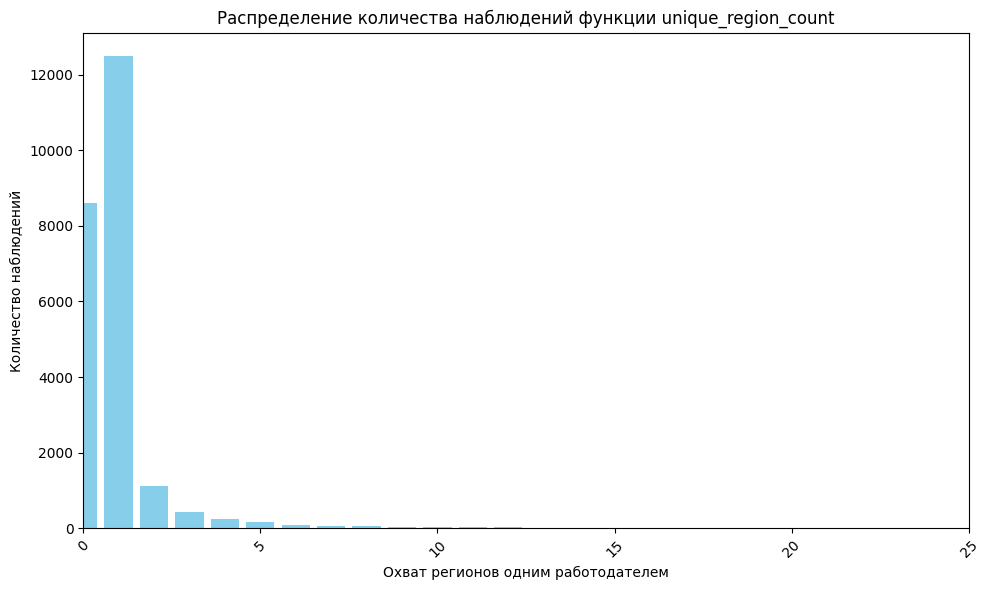

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_sql_query(query_5_3, connection)

unique_counts = data['unique_region_count'].value_counts()

# Данные для визуализации
labels = unique_counts.index
counts = unique_counts.values

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Охват регионов одним работодателем')
plt.ylabel('Количество наблюдений')
plt.title('Распределение количества наблюдений функции unique_region_count')
plt.xticks(rotation=45)
plt.tight_layout()  # Ограничение подписей

# Настройка пределов по оси X
plt.xlim(0, 25)  # Левая и правая граница по оси X

plt.xticks(rotation=45)
plt.tight_layout()  # Ограничение подписей
# Отображение графика
plt.show()

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [141]:
query_5_4 = f'''SELECT 
                    e.id AS employer_id
                FROM 
                    Employers e
                LEFT JOIN 
                    Employers_Industries ei ON e.id = ei.employer_id
                WHERE 
                    ei.industry_id IS NULL
                ORDER BY 
                    e.id;'''

In [142]:
df = pd.read_sql_query(query_5_4, connection)
print(df)

      employer_id
0             960
1            1304
2            1811
3            2053
4            3204
...           ...
8414      8903436
8415      8903831
8416      8904282
8417      8905803
8418      8906189

[8419 rows x 1 columns]


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2937470563.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [143]:
query_5_5 = f'''SELECT 
                    e.name
                FROM 
                    Employers e
                JOIN 
                    Employers_Industries ei ON e.id = ei.employer_id
                GROUP BY 
                    e.id, e.name
                HAVING 
                    COUNT(ei.industry_id) = 4
                ORDER BY 
                    e.name ASC;'''

In [144]:
df = pd.read_sql_query(query_5_5, connection)
print(df)

                 name
0        101 Интернет
1            21vek.by
2                2ГИС
3                  2К
4         4 пикселя +
...               ...
1133            ЮРИОН
1134  ЮТИП Технологии
1135           ЯКласс
1136            ЯрНео
1137    Яшин&Партнёры

[1138 rows x 1 columns]


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3681462011.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [145]:
query_5_6 = f'''SELECT 
                    COUNT(DISTINCT ei.employer_id) AS unique_employer_count
                FROM 
                    Employers_Industries ei
                JOIN 
                    Industries i ON ei.industry_id = i.id
                WHERE 
                    i.name = 'Разработка программного обеспечения';'''

In [146]:
df = pd.read_sql_query(query_5_6, connection)
print(df)

   unique_employer_count
0                   3553


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\1267612721.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [147]:
import requests
from bs4 import BeautifulSoup

def get_million_cities(url):
    # Отправляем запрос на указанный url
    response = requests.get(url)
    
    # Проверяем успешность запроса
    if response.status_code == 200:
        # Создаем объект BeautifulSoup из полученного HTML-кода
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Поиск таблицу с городами-миллионерами
        table = soup.find('table') 
        
        cities = []
        
        if table:
            # Проходим по всем строкам таблицы
            for row in table.find_all('tr'):
                cells = row.find_all('td')
                if cells:
                    city_name = cells[1].get_text(strip=True)  # Получаем название города из второго столбца
                    cities.append(city_name)
                    
            return cities
        else:
            return "Таблица не найдена."
    else:
        return f"Ошибка при обращении к URL: {response.status_code}"

# Включение функции
url = "https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"
million_cities = get_million_cities(url)

# Cписок городов-миллионеров
if isinstance(million_cities, list):
    for city in million_cities:
        display(city)
else:
    display(million_cities)


'Москва'

'Санкт-Петербург'

'Новосибирск'

'Екатеринбург'

'Казань'

'Красноярск'

'Нижний Новгород'

'Челябинск'

'Уфа'

'Самара'

'Ростов-на-Дону'

'Краснодар'

'Омск'

'Воронеж'

'Пермь'

'Волгоград'

In [148]:
formatted_cities = ", ".join([f"'{city}'" for city in million_cities])  # Преобразован в строку для SQL
query_5_7 = f'''WITH filtered_vacancies AS (
    SELECT 
        v.id AS vacancy_id,
        v.employer_id,
        v.area_id,
        e.name AS employer_name,
        a.name AS area_name
    FROM 
        Vacancies v
    JOIN 
        Employers e ON v.employer_id = e.id
    JOIN 
        Areas a ON v.area_id = a.id
    WHERE 
        e.name = 'Яндекс'
        AND a.name IN ({formatted_cities})  -- Используем форматированную строку
)
    SELECT 
        area_name,
        COUNT(vacancy_id) AS vacancy_count
    FROM 
        filtered_vacancies
    GROUP BY 
        area_name

    UNION ALL

    SELECT 
        'Total' AS area_name,
        COUNT(vacancy_id) AS vacancy_count
    FROM 
        filtered_vacancies;'''

In [149]:
df = pd.read_sql_query(query_5_7, connection)
print(df)

          area_name  vacancy_count
0            Казань             25
1   Нижний Новгород             36
2      Екатеринбург             39
3       Новосибирск             35
4        Красноярск             23
5              Омск             21
6           Воронеж             32
7             Пермь             25
8               Уфа             26
9         Челябинск             22
10           Москва             54
11  Санкт-Петербург             42
12        Волгоград             24
13           Самара             26
14   Ростов-на-Дону             25
15        Краснодар             30
16            Total            485


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2442790807.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


***

Упоминание таких компаний, как Яндекс, Ростелеком, Тинькофф и СБЕР в рамках топ-5 проактивных работодателей, подчеркивает высокую конкурентоспособность и активность IT-сектора и смежных областей в привлечении кадров. Это свидетельствует о том, что данные компании не только создали значительное количество вакансий, но и активно ищут талантливых специалистов, что связано с их амбициозными проектами и инновациями. Интересный момент заключается в том, что среди этих лидеров только Газпромнефть представляет сектор реального производства, что говорит о том, что традиционные отрасли, такие как энергетика, постепенно уступают позиции более динамичному IT-сектору в контексте привлечения кадров. Информация о том, что около 1000 работодателей функционируют в регионах без открытых вакансий, намекает на тенденции поиска талантов, основанного на резюме. Это может свидетельствовать о том, что работодатели более заинтересованы в привлечении специалистов с уникальными навыками, а не только в наличии открытых вакансий. Такой подход, возможно, обусловлен нехваткой квалифицированных кадров в определенных областях, что особенно актуально для регионов, где рынок труда может оказаться менее активным. Другой важный аспект заключается в недостатке информации, о чем говорит отсутствие указанной сферы деятельности у 8419 работодателей. Этот момент подчеркивает как отсутствие прозрачности на рынке труда, так и возможные сложности в поиске подходящих кандидатов. Если компании не указывают свою сферу деятельности, это может быть следствием того, что они занимаются многими проектами или меняют направление своей работы, что создает неясность и затрудняет возможности для соискателей. Кроме того, акцент на многообразии IT-компаний и их предложениях также подтверждает тенденцию к размыванию традиционных границ между разными секторами. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [150]:
query_6_1 = f'''SELECT COUNT(*) AS vacancy_count
               FROM Vacancies
               WHERE LOWER(name) LIKE '%data%'
               OR LOWER(name) LIKE '%данн%';'''

In [151]:
df = pd.read_sql_query(query_6_1, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\2816267549.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


   vacancy_count
0           1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [152]:
#Создаем запрос по поиску определенных сочений слов
query_6_2 = f'''SELECT COUNT(*) AS vacancy_count
                FROM Vacancies
                WHERE (
                        LOWER(name) LIKE '%data scientist%'
                OR LOWER(name) LIKE '%data science%'
                OR LOWER(name) LIKE '%исследователь данных%'
                OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
                OR LOWER(name) LIKE '%machine learning%'
                OR LOWER(name) LIKE '%машинн%обучен%'
                )
                AND (
                        LOWER(name) LIKE '%junior%'
                OR experience = 'Нет опыта'
                OR employment = 'Стажировка'
                );'''

In [153]:
df = pd.read_sql_query(query_6_2, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\4185113083.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


   vacancy_count
0             51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [154]:
query_6_3 = f'''SELECT COUNT(*) AS vacancy_count
                FROM Vacancies
                WHERE (
                        LOWER(name) LIKE '%data scientist%'
                    OR LOWER(name) LIKE '%data science%'
                    OR LOWER(name) LIKE '%исследователь данных%'
                    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
                    OR LOWER(name) LIKE '%machine learning%'
                    OR LOWER(name) LIKE '%машинн%обучен%'
                    )
                AND (
                        (LOWER(key_skills) LIKE '%sql%' OR LOWER(key_skills) LIKE '%postgres%')
                    );'''

In [155]:
df = pd.read_sql_query(query_6_3, connection)
print(df)

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\92655099.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


   vacancy_count
0            229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [156]:
query_6_4 = f'''SELECT COUNT(*) AS vacancy_count
                FROM Vacancies
                WHERE (
                        LOWER(name) LIKE '%data scientist%'
                    OR LOWER(name) LIKE '%data science%'
                    OR LOWER(name) LIKE '%исследователь данных%'
                    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
                    OR LOWER(name) LIKE '%machine learning%'
                    OR LOWER(name) LIKE '%машинн%обучен%'
                    )
                AND (
                        (LOWER(key_skills) LIKE '%python%')
                    );'''

In [157]:
df = pd.read_sql_query(query_6_4, connection)
print(df)

   vacancy_count
0            357


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\58020356.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [158]:
query_6_5 = f'''SELECT 
                    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills
                FROM 
                    vacancies v
                WHERE 
                    (v.name ILIKE '%data scientist%'
                    OR LOWER(v.name) ILIKE '%data science%'
                    OR v.name ILIKE '%исследователь данных%'
                    OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%html%')
                    OR v.name ILIKE '%machine learning%'
                    OR v.name ILIKE '%машинн%обучен%')
                    AND (v.key_skills IS NOT NULL)
                ORDER BY 
                    avg_key_skills DESC;
                '''

In [159]:
df = pd.read_sql_query(query_6_5, connection)
print(df) 

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3144451476.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


   avg_key_skills
0            6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [160]:
query_6_6 = f'''SELECT 
                    experience,
                    ROUND(AVG(avg_salary)) AS avg_salary
                FROM (
                    SELECT 
                        experience,
                        (COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) / 
                        CASE 
                            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN 2
                            ELSE 1
                        END AS avg_salary
                    FROM 
                        vacancies v  -- Убедитесь, что таблица называется "vacancies"
                    WHERE 
                        (v.name ILIKE '%data scientist%'
                        OR LOWER(v.name) ILIKE '%data science%'
                        OR v.name ILIKE '%исследователь данных%'
                        OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%html%')
                        OR v.name ILIKE '%machine learning%'
                        OR v.name ILIKE '%машинн%обучен%')
                    AND (v.key_skills IS NOT NULL)
                    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
                    AND experience IN ('Более 6 лет', 'Нет опыта', 'От 3 до 6 лет', 'От 1 года до 3 лет')
                ) AS subquery
                GROUP BY 
                    experience
                ORDER BY 
                    experience;
                '''

In [161]:
df = pd.read_sql_query(query_6_6, connection)
print(df) 

           experience  avg_salary
0           Нет опыта     74643.0
1  От 1 года до 3 лет    146704.0
2       От 3 до 6 лет    243115.0


C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3003024903.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


***

Исходя из начального количество вакансий, относящихся к данным, равного 1771, становится ясно, что рынок предлагает значительное количество предложений, что демонстрирует актуальность и востребованность данной специальности. При анализе вакансий для начинающих дата-сайентистов, количество таких вакансий составило всего 51, что указывает на наличие ограниченных возможностей для тех, кто только начинает свою карьеру в этой области. Вакансии, в которых в качестве ключевого навыка указан SQL или Postgres, составляют 229. Это подчеркивает важность этих технологий для работодателей, ориентирующихся на дата-сайентистов. Аналогичным образом, количество вакансий с указанием Python как ключевого навыка составило 357, что еще раз подтверждает популярность и, возможно, универсальность Python в различных данных и аналитических проектах. Кроме того, среднее количество ключевых навыков, указанных в вакансиях для дата-сайентистов, составляет 6.41. Это говорит о том, что работодатели ожидают от соискателей обладать разнообразными навыками, что может включать как технические знания, так и софт-скиллы. Что касаемо зарплатных ожиданий, выяснено, что дата-сайентист с опытом от 3 до 6 лет может рассчитывать на среднюю зарплату в 243115, что  позволяет оценить потенциальные финансовые результаты карьеры в данной области и может служить ориентиром для соискателей.

# Общий вывод по проекту

Подводя итоги проведенного анализа вакансий в области data scientist специальностей, можно заметить, что представленные данные предоставляют ценную информацию о текущем состоянии рынка труда, потребностях работодателей и возможностях для соискателей, особенно для начинающих специалистов. Констатация количества вакансий, относящихся к данной области, размера востребованных навыков и ожидаемых зарплат помогает лучше понять, как подготовиться к карьере в этой динамично развивающейся сфере.

Исходя из полученных результатов, можно заключить, что несмотря на относительно небольшое количество вакансий для начинающих дата-сайентистов, широкий спектр требуемых навыков и соответствующее вознаграждение по мере роста опыта подчеркивают важность подготовки и усовершенствования знаний. Важно также отметить значимость таких технологий, как SQL и Python, которые являются ключевыми для успешной карьеры в этой области.

Для дальнейшего развития исследования можно рассмотреть несколько направлений. Во-первых, стоит углубиться в анализ конкретных требований к навыкам, чтобы составить более детальную картину, какие конкретно знания востребованы в разных компаниях и отраслях. Можно также провести опрос среди работодателей, чтобы выяснить, какие дополнительные качества они ищут в кандидатах, помимо чисто технических навыков.

Кроме того, будет полезно провести анализ изменений в требованиях к вакансиям с течением времени, например, исследовать данные за несколько лет, чтобы определить, какие навыки становятся более или менее актуальными. Ниже представлен запрос, демонстрирующий наиболее востребованные ключевые навыки в зависимости от требований к опыту. Результаты показывает довольно однородную картину, однако стоит отметить, что в рамках выборки, включающей около 400 вакансий, требования в целом имеют значительное разнообразие, поскольку максимальное значение одного из ключевых навыков превышает 100.  Можно включить в исследование и сравнительный анализ зарплат в разных географических регионах, чтобы выяснить, как географическое положение влияет на финансовые перспективы дата-сайентистов. Наконец, стоит обратить внимание на обучение и развитие карьерного роста, исследуя, какие курсы и программы подготовки существуют и насколько они соответствуют требованиям рынка. Все эти направления способны углубить понимание текущих и будущих трендов в сфере данных, а также помочь соискателям лучше ориентироваться в своем профессиональном развитии.

In [162]:
query_6_7 = f'''WITH skill_counts AS (
    SELECT 
        experience, 
        UNNEST(STRING_TO_ARRAY(key_skills, CHR(9))) AS skill
    FROM 
        vacancies
    WHERE 
        (name ILIKE '%data scientist%'
        OR LOWER(name) ILIKE '%data science%'
        OR name ILIKE '%исследователь данных%'
        OR (name LIKE '%ML%' AND name NOT ILIKE '%html%')
        OR name ILIKE '%machine learning%'
        OR name ILIKE '%машинн%обучен%')
        AND (key_skills IS NOT NULL)
),
skill_summary AS (
    SELECT 
        experience, 
        skill, 
        COUNT(*) AS skill_count
    FROM 
        skill_counts
    GROUP BY 
        experience, skill
),
ranked_skills AS (
    SELECT 
        experience, 
        skill, 
        skill_count, 
        ROW_NUMBER() OVER (PARTITION BY experience ORDER BY skill_count DESC) AS rank
    FROM 
        skill_summary
)
SELECT 
    experience, 
    skill, 
    skill_count
FROM 
    ranked_skills
WHERE 
    rank <= 5
ORDER BY 
    CASE 
        WHEN experience = 'Нет опыта' THEN 1
        WHEN experience = 'От 1 года до 3 лет' THEN 2
        WHEN experience = 'От 3 до 6 лет' THEN 3
        WHEN experience = 'Более 6 лет' THEN 4
        ELSE 5 -- Для любых других значений, если они присутствуют
    END,
    skill_count DESC;
            '''

In [163]:
df = pd.read_sql_query(query_6_7, connection)
print(df) 

C:\Users\vani003\AppData\Local\Temp\ipykernel_8652\3251607571.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_7, connection)


            experience                         skill  skill_count
0            Нет опыта                        Python           23
1            Нет опыта              Machine Learning           11
2            Нет опыта                           SQL           10
3            Нет опыта                            ML            7
4            Нет опыта                  Data Science            6
5   От 1 года до 3 лет                        Python          156
6   От 1 года до 3 лет                           SQL          124
7   От 1 года до 3 лет              Machine Learning           43
8   От 1 года до 3 лет     Математическая статистика           42
9   От 1 года до 3 лет  Математическое моделирование           32
10       От 3 до 6 лет                        Python          149
11       От 3 до 6 лет                           SQL           55
12       От 3 до 6 лет              Machine Learning           41
13       От 3 до 6 лет                  Data Science           27
14       О

In [164]:
# закрыть соединение
connection.close()